### K-means clustering is a simple yet very effective unsupervised machine learning algorithm for data clustering. It clusters data based on the Euclidean distance between data points. K-means clustering algorithm has many uses for grouping text documents, images, videos, and much more.

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target




In [4]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [5]:
k_means = KMeans(3)
k_means.fit(x) 

print(k_means.labels_[::10])

print(y[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
     Target
0         0
10        0
20        0
30        0
40        0
50        1
60        1
70        1
80        1
90        1
100       2
110       2
120       2
130       2
140       2


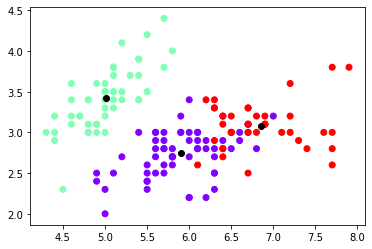

In [6]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=k_means.labels_, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0] ,k_means.cluster_centers_[:,1], color='black')

Text(0.5, 1.0, 'Petal Length vs Petal Width')

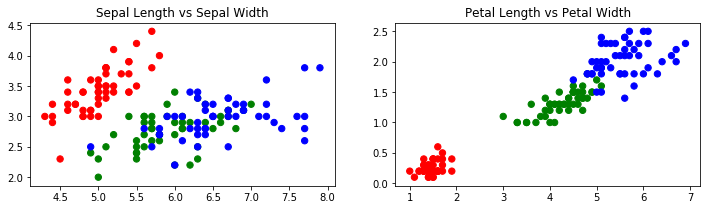

In [7]:
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']], s=40)
plt.title('Petal Length vs Petal Width')

In [8]:
#Now let’s use the KMeans algorithm to see if it can create the clusters automatically.

# create a model object with 3 clusters
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
# http://scikit-learn.org/stable/modules/clustering.html#k-means
model = KMeans(n_clusters=3)
model.fit(x)
 #function runs the algo on the data and creates the clusters. Each sample in the dataset is then assigned a cluster id (0, 1, 2, etc).

#model.labels_ holds the array of the cluster ids, so let’s take a look at it.



KMeans(n_clusters=3)

In [9]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Text(0.5, 1.0, "Model's classification")

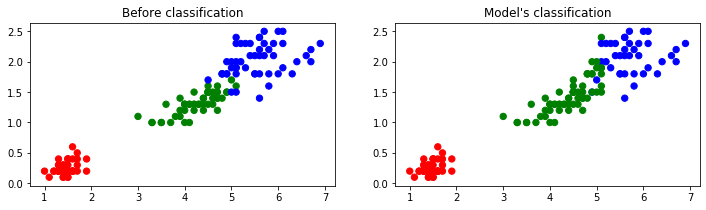

In [10]:
#Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

# The fudge to reorder the cluster ids.
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
plt.title('Before clustering')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
plt.title("Model's clustering")

### Drawback of standard K-means algorithm:
### *It is sensitive to the initialization of the centroids or the mean points. 
### So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it, and at the same time, more than one cluster might end up linked with a single centroid. 
### Similarly, more than one centroids might be initialized into the same cluster resulting in poor clustering. 
### K-mean++:
### To overcome the above-mentioned drawback we use K-means++. 
### This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. 
### Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. 
### That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.
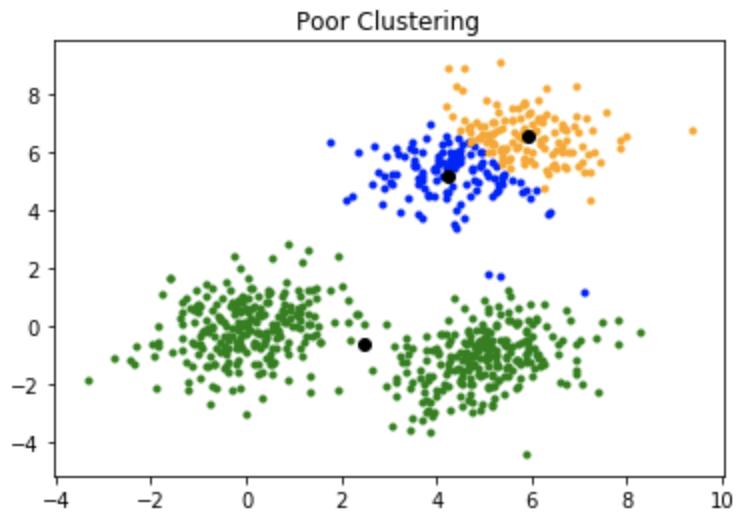
Figur1. source www.geeksforgeeks.org
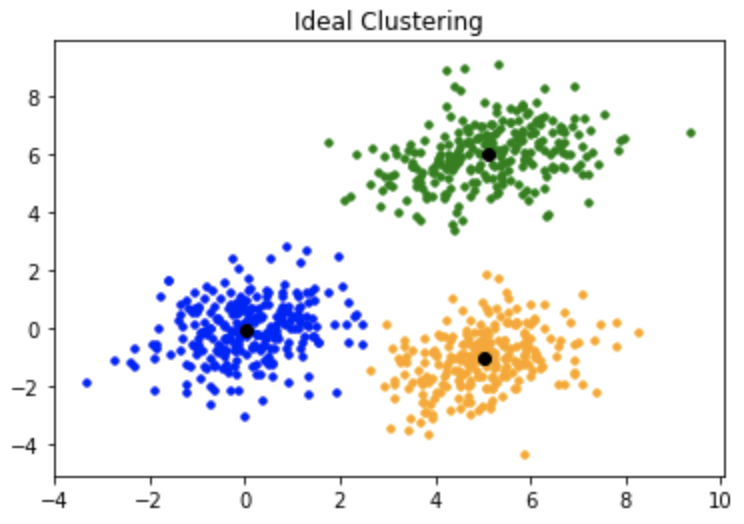
Figure 2 source www.geeksforgeeks.org

In [11]:
dataset = pd.read_csv('Iris.csv')
x1 = dataset.iloc[:, [1, 2, 3, 4]].values

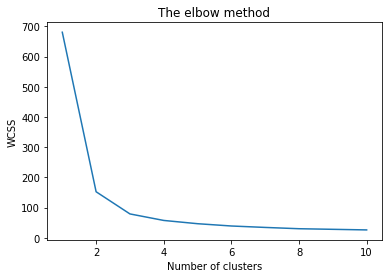

In [12]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [13]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x1)

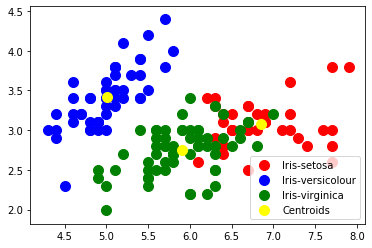

In [14]:
#Visualising the clusters
plt.scatter(x1[y_kmeans == 0, 0], x1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x1[y_kmeans == 1, 0], x1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x1[y_kmeans == 2, 0], x1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()